In [1]:
import numpy as np  
import matplotlib.pyplot as plt  
from scipy.integrate import odeint  
import math

## Task 2a

In [2]:
def sdot_repressilator(s,t,params):  
    
    km, km0, kdm, kp, kdp, K, n = params 
    m_tetR, m_lacI, m_cI, p_tetR, p_lacI, p_cI = s
        
    rate_m_tetR_prod = km*((K**n)/((K**n)+(p_lacI**n)))+km0 
    rate_m_lacI_prod = km*((K**n)/((K**n)+(p_cI**n)))+km0 
    rate_m_cI_prod   = km*((K**n)/((K**n)+(p_tetR**n)))+km0
    
    rate_p_tetR_prod = kp*m_tetR
    rate_p_lacI_prod = kp*m_lacI
    rate_p_cI_prod   = kp*m_cI
    
    rate_m_tetR_loss = kdm*m_tetR
    rate_m_lacI_loss = kdm*m_lacI
    rate_m_cI_loss   = kdm*m_cI
    
    rate_p_tetR_loss = kdp*p_tetR
    rate_p_lacI_loss = kdp*p_lacI
    rate_p_cI_loss   = kdp*p_cI
    
    dm_tetR = rate_m_tetR_prod - rate_m_tetR_loss
    dm_lacI = rate_m_lacI_prod - rate_m_lacI_loss
    dm_cI   = rate_m_cI_prod - rate_m_cI_loss
    
    dp_tetR = rate_p_tetR_prod - rate_p_tetR_loss
    dp_lacI = rate_p_lacI_prod - rate_p_lacI_loss
    dp_cI   = rate_p_cI_prod - rate_p_cI_loss
    
    ds = [dm_tetR, dm_lacI, dm_cI, dp_tetR, dp_lacI, dp_cI]
    
    return ds  

In [3]:
# default parameter values 
# to match Repressilator model
km = 30
km0 = 0.03
kdm = 0.3466
kp = 6.931
kdp = 0.06931
K = 40
n = 2

params = [km, km0, kdm, kp, kdp, K, n]


#intitial condtions
m_tetR0 = 0
m_lacI0 = 0
m_cI0   = 0

p_tetR0 = 5
p_lacI0 = 0
p_cI0   = 0

s0 = [m_tetR0, m_lacI0, m_cI0, p_tetR0, p_lacI0, p_cI0]


# set time observations
t_max = 1000
t_obs = np.linspace(0,t_max,t_max+1)

# run simulation
s_obs1 = odeint(sdot_repressilator,s0,t_obs,args=(params,))  

m_tetR_obs1 = s_obs1[:,0]
m_lacI_obs1 = s_obs1[:,1]
m_cI_obs1 =   s_obs1[:,2]

p_tetR_obs1 = s_obs1[:,3]
p_lacI_obs1 = s_obs1[:,4]
p_cI_obs1 =   s_obs1[:,5]

### Repressilator ODE simulation results

Text(0, 0.5, 'Protein concentration')

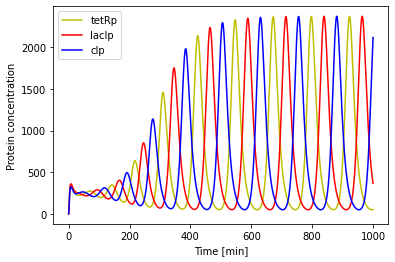

In [4]:
%matplotlib inline
fig, ax = plt.subplots(1,1)

ax.plot(t_obs, p_tetR_obs1, "y-", label="tetRp")
ax.plot(t_obs, p_lacI_obs1, "r-", label="lacIp")
ax.plot(t_obs, p_cI_obs1, "b-", label="cIp")
ax.legend()
ax.set_xlabel("Time [min]")
ax.set_ylabel("Protein concentration")

# plt.savefig("Task2_figure1.png")

In [5]:
#intitial condtions for steady state
m_tetR0 = 0
m_lacI0 = 0
m_cI0   = 0

p_tetR0 = 5
p_lacI0 = 5
p_cI0   = 5

s0 = [m_tetR0, m_lacI0, m_cI0, p_tetR0, p_lacI0, p_cI0]

# run simulation
s_obs2 = odeint(sdot_repressilator,s0,t_obs,args=(params,))  

m_tetR_obs2 = s_obs2[:,0]
m_lacI_obs2 = s_obs2[:,1]
m_cI_obs2 =   s_obs2[:,2]

p_tetR_obs2 = s_obs2[:,3]
p_lacI_obs2 = s_obs2[:,4]
p_cI_obs2 =   s_obs2[:,5]

### Repressilator ODE simulation of the steady state

Text(0, 0.5, 'Protein concentration')

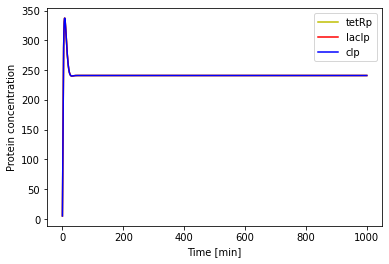

In [6]:
fig, ax = plt.subplots(1,1)

ax.plot(t_obs, p_tetR_obs2, "y-", label="tetRp")
ax.plot(t_obs, p_lacI_obs2, "r-", label="lacIp")
ax.plot(t_obs, p_cI_obs2, "b-", label="cIp")
ax.legend()
ax.set_xlabel("Time [min]")
ax.set_ylabel("Protein concentration")

# plt.savefig("Task2_figure2.png")

## Task 2b

In [7]:
#3rd set of start conditions for phase plot plotting 
m_tetR0 = 0
m_lacI0 = 0
m_cI0   = 0

p_tetR0 = 5
p_lacI0 = 4.9
p_cI0   = 5

s0 = [m_tetR0, m_lacI0, m_cI0, p_tetR0, p_lacI0, p_cI0]

# run simulation
s_obs3 = odeint(sdot_repressilator,s0,t_obs,args=(params,))  

m_tetR_obs3 = s_obs3[:,0]
m_lacI_obs3 = s_obs3[:,1]
m_cI_obs3 =   s_obs3[:,2]

p_tetR_obs3 = s_obs3[:,3]
p_lacI_obs3 = s_obs3[:,4]
p_cI_obs3 =   s_obs3[:,5]

In [8]:
#4th set of start conditions for phase plot plotting 
m_tetR0 = 0
m_lacI0 = 0
m_cI0   = 0

p_tetR0 = 5
p_lacI0 = 3
p_cI0   = 5

s0 = [m_tetR0, m_lacI0, m_cI0, p_tetR0, p_lacI0, p_cI0]

# run simulation
s_obs4 = odeint(sdot_repressilator,s0,t_obs,args=(params,))  

m_tetR_obs4 = s_obs4[:,0]
m_lacI_obs4 = s_obs4[:,1]
m_cI_obs4 =   s_obs4[:,2]

p_tetR_obs4 = s_obs4[:,3]
p_lacI_obs4 = s_obs4[:,4]
p_cI_obs4 =   s_obs4[:,5]

### Repressilator ODE Phase plot

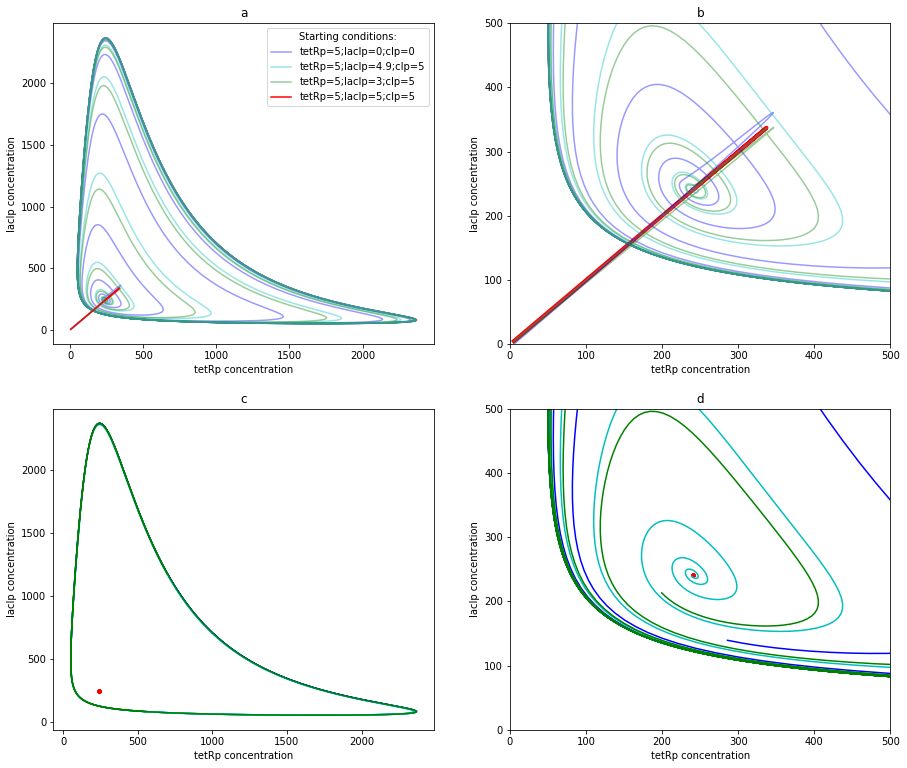

In [9]:
fig, ax = plt.subplots(2,2, figsize=(15,13))
ax1, ax3 = ax[:,0]
ax2, ax4 = ax[:,1]

ax1.set_title("a")
ax1.plot(p_tetR_obs1, p_lacI_obs1, "b-", label="tetRp=5;lacIp=0;cIp=0", alpha=0.4)
ax1.plot(p_tetR_obs3, p_lacI_obs3, "c-", label="tetRp=5;lacIp=4.9;cIp=5", alpha=0.4)
ax1.plot(p_tetR_obs4, p_lacI_obs4, "g-", label="tetRp=5;lacIp=3;cIp=5", alpha=0.4)
ax1.plot(p_tetR_obs2, p_lacI_obs2, "r-", label="tetRp=5;lacIp=5;cIp=5")

ax2.set_title("b")
ax2.plot(p_tetR_obs2, p_lacI_obs2, "r-", label="tetRp=5;lacIp=5;cIp=5",  linewidth=4)
ax2.plot(p_tetR_obs1, p_lacI_obs1, "b-", label="tetRp=5;lacIp=0;cIp=0", alpha=0.4)
ax2.plot(p_tetR_obs3, p_lacI_obs3, "c-", label="tetRp=5;lacIp=4.9;cIp=5", alpha=0.4)
ax2.plot(p_tetR_obs4, p_lacI_obs4, "g-", label="tetRp=5;lacIp=3;cIp=5", alpha=0.4)
ax2.set_xlim(0,500)
ax2.set_ylim(0,500)

ax3.set_title("c")
ax3.plot(p_tetR_obs1[799:], p_lacI_obs1[799:], "b-", label="tetRp=5;lacIp=0;cIp=0")
ax3.plot(p_tetR_obs3[799:], p_lacI_obs3[799:], "c-", label="tetRp=5;lacIp=4.9;cIp=5")
ax3.plot(p_tetR_obs4[799:], p_lacI_obs4[799:], "g-", label="tetRp=5;lacIp=3;cIp=5")
ax3.plot(p_tetR_obs2[799:], p_lacI_obs2[799:], "r.", label="tetRp=5;lacIp=5;cIp=5")

ax4.set_title("d")
ax4.plot(p_tetR_obs2[199:], p_lacI_obs2[199:], "r.", label="tetRp=5;lacIp=5;cIp=5")
ax4.plot(p_tetR_obs1[199:], p_lacI_obs1[199:], "b-", label="tetRp=5;lacIp=0;cIp=0")
ax4.plot(p_tetR_obs3[199:], p_lacI_obs3[199:], "c-", label="tetRp=5;lacIp=4.9;cIp=5")
ax4.plot(p_tetR_obs4[199:], p_lacI_obs4[199:], "g-", label="tetRp=5;lacIp=3;cIp=5")
ax4.set_xlim(0,500)
ax4.set_ylim(0,500)

ax1.set_xlabel("tetRp concentration")
ax1.set_ylabel("lacIp concentration")
ax2.set_xlabel("tetRp concentration")
ax2.set_ylabel("lacIp concentration")
ax3.set_xlabel("tetRp concentration")
ax3.set_ylabel("lacIp concentration")
ax4.set_xlabel("tetRp concentration")
ax4.set_ylabel("lacIp concentration")
ax1.legend(title="Starting conditions:")

plt.savefig("Task2_figure3.png")

#### Interactive Suplementary Figure - Task 2 Figure 3c in 3D space

<IPython.core.display.Javascript object>


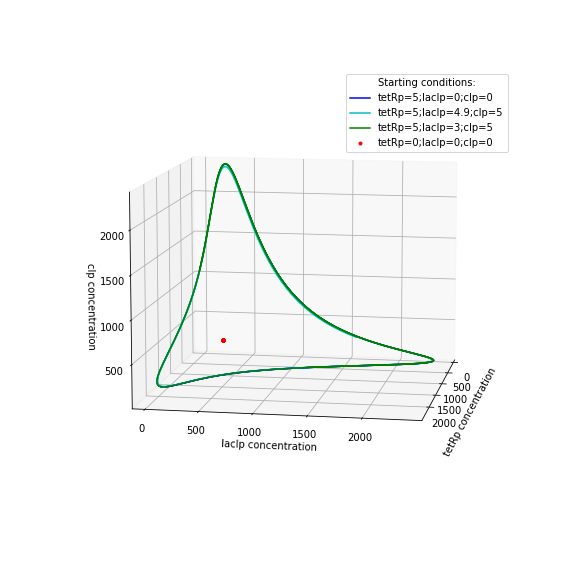

In [13]:
%matplotlib notebook
fig = plt.figure(figsize=(8,8))

ax = plt.axes(projection='3d')
ax.view_init(10, 10)

# limit cycle
ax.plot3D(p_tetR_obs1[799:], p_lacI_obs1[799:], p_cI_obs1[799:], "b-", label="tetRp=5;lacIp=0;cIp=0")
ax.plot3D(p_tetR_obs3[799:], p_lacI_obs3[799:], p_cI_obs3[799:], "c-", label="tetRp=5;lacIp=4.9;cIp=5")
ax.plot3D(p_tetR_obs4[799:], p_lacI_obs4[799:], p_cI_obs4[799:], "g-", label="tetRp=5;lacIp=3;cIp=5")

# steady state
ax.plot3D(p_tetR_obs2[799:], p_lacI_obs2[799:], p_cI_obs2[799:], "r.", label="tetRp=0;lacIp=0;cIp=0")

ax.set_xlabel("tetRp concentration")
ax.set_ylabel("lacIp concentration")
ax.set_zlabel("cIp concentration")
ax.legend(title="Starting conditions:")

#### Suplementary Figure - showing delay in reaching limit cycle when starting conditions are close to steady state

Text(0, 0.5, 'Protein concentration')

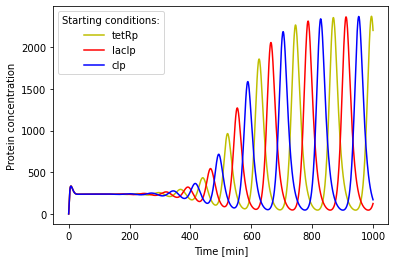

In [11]:
%matplotlib inline
fig, ax = plt.subplots(1,1)

ax.plot(t_obs, p_tetR_obs3, "y-", label="tetRp")
ax.plot(t_obs, p_lacI_obs3, "r-", label="lacIp")
ax.plot(t_obs, p_cI_obs3, "b-", label="cIp")

ax.legend(title="Starting conditions:")
ax.set_xlabel("Time [min]")
ax.set_ylabel("Protein concentration")